# Цель исследования

Выявить определяющие успешность игры закономерности: определить актуальный период для платформы, выявить наиболее привлекательные для инвестиций платформы, изучить зависимость между отзывами критиков и пользователей и продажами, рассмотреть региональные предпочтения пользователей, проверить гипотезы.

# Ход исследования

1. Подготовка данных
2. Исследовательский анализ данных
3. Составление портрета пользователя каждого региона
4. Проверка гипотез
5. Вывод

## Подготовка данных

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
data.columns = data.columns.str.lower()

Данные в столбце name  не пригодны для составления гистограммы
Данные в столбце platform  не пригодны для составления гистограммы
Данные в столбце genre  не пригодны для составления гистограммы
Данные в столбце user_score  не пригодны для составления гистограммы
Данные в столбце rating  не пригодны для составления гистограммы


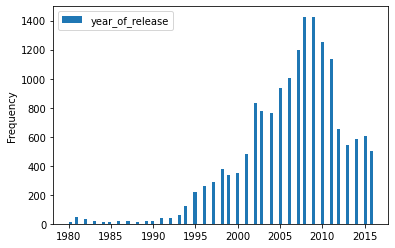

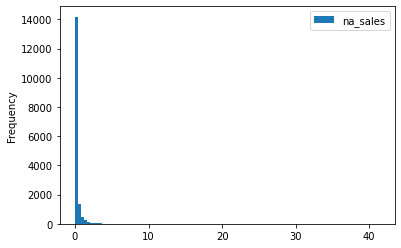

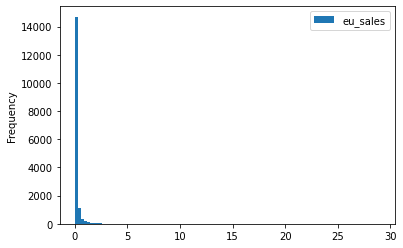

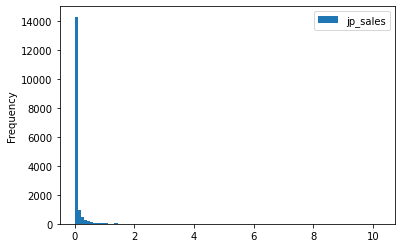

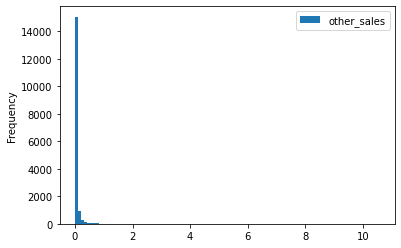

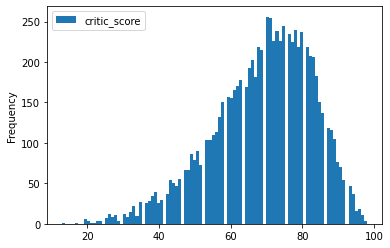

In [ ]:
for i in data.columns:
    try:
        data.plot(y = i, kind = 'hist', bins = 100)
    except:
        print('Данные в столбце', i, ' не пригодны для составления гистограммы')

Подсчитаем количество пропусков в датафрейме.

In [ ]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Узнаем, сколько составляют пропуски от всего количесвта данных в каждом столбце в процентном соотношении:

In [ ]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

Сразу же удалим строки с пропусками в столбцах "name", "genre". Судя по тому, что доля пропусков в этих колонках одинакова, можно предположить что полностью стала утеряна информация об одной или двух играх.

In [ ]:
data = data.dropna(subset = ['name', 'genre'])

Процент пропусков невелик также и в столбце с годом выпуска, значит удалим и эти строки.

In [ ]:
data = data.dropna(subset = ['year_of_release'])

In [ ]:
data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.401666
rating             0.405984
dtype: float64

Остались пропуски, удаление которых приведет к потере значительной части данных.

Рассмотрим значения в столбце с оценкой критиков.

In [ ]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Для дальнейшего удобства заполним пропуски в данном столбце нулями. Так как в уникальных значениях данного столбца не встречается ноль изначально, то пропуски в нем  ни с чем не получится спутать. Затем преобразуем тип данных в этом столбце в integer, т.к. у всех оценок дробная часть равна нулю.

In [ ]:
data['critic_score']= data['critic_score'].fillna(-1)
data['critic_score']= data['critic_score'].astype(int)

<AxesSubplot:ylabel='Frequency'>

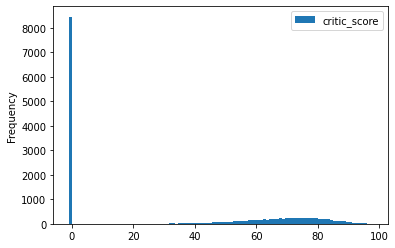

In [ ]:
data.plot(y = 'critic_score', kind = 'hist', bins = 100 )

Заодно преобразуем к integer и столбец с годом выпуска игры, так как год дробным быть не может.

In [ ]:
data['year_of_release'] = data['year_of_release'].astype(int)

Теперь рассмотрим столбец с оценкой пользователей.

In [ ]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В списке присутствует тип оценки 'tbd', который по сути эквивалентен значению nan. Но так как в уникальных значениях встерчается ноль, то пропуски в данном столбце заменим на -1.

In [ ]:
data['user_score']= data['user_score'].fillna(-1)
data['user_score']= data['user_score'].replace('tbd',-1)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что заменили 'tbd' и пропуски в 'user_score' на заглушку. 👍 Главное потом не забывать ее отфильтровывать при анализе.</font><br>

Приведем тип данных к float.

In [ ]:
data['user_score']= data['user_score'].astype(float)

In [ ]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Нулями так же заполним пропуски в столбце с рейтингом.  

In [ ]:
data['rating'] = data['rating'].fillna('-')

Проверим датасет на налчие явных дубликатов.

In [ ]:
data.duplicated().sum()

0

Подсчитаем общее количсество продаж по регионам:

In [ ]:
total_sales = {'Region': ['North_America','Europe','Japan', 'Other'],'Total_Sales':[data['na_sales'].sum(), data['eu_sales'].sum(), data['jp_sales'].sum(), data['other_sales'].sum()]}
total_sales_df = pd.DataFrame(total_sales)
total_sales_df

,Region,Total_Sales
0,North_America,4341.42
1,Europe,2399.68
2,Japan,1290.64
3,Other,782.63


In [ ]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name : кол-во NaN 0 , процент NaN 0.0 %
---------------

## Исследовательский анализ данных

Рассмотрим количество выпущенных игр в разные годы.

Text(0, 0.5, 'total_sales')

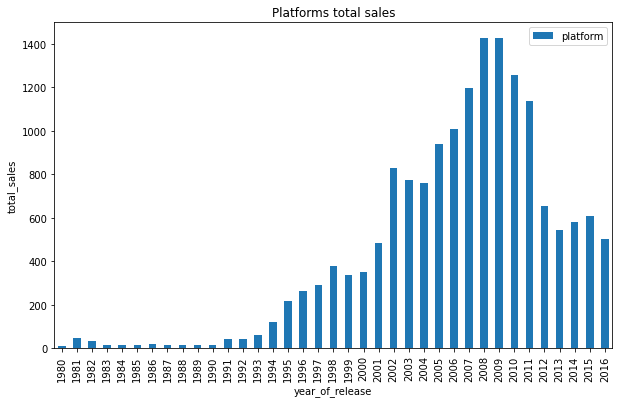

In [ ]:
data.pivot_table(index = 'year_of_release', values = 'platform', aggfunc = 'count').plot(kind = 'bar',figsize = (10,6), title = 'Platforms total sales').set_ylabel("total_sales")

По графику видно, что пик продаж приходится на 2007-2011 года.

Создадим столбец с общим числом продаж.

In [ ]:
data['total_sales'] = data['eu_sales'] + data['jp_sales'] + data['na_sales'] + data['other_sales']

Далее рассмотрим изменение продаж со временем по платформам.

In [ ]:

platforms = data.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales')
platforms



year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,1.264444,0.775652,0.802222,0.530909,0.270000,0.450000,0.335000,0.323333,0.370000,0.315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.544828,0.552258,0.621648,0.547000,0.323023,0.329130
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020000,0.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.020000,NaN,NaN,NaN,NaN,...,0.390798,0.295346,0.296625,0.263220,0.171111,0.478696,0.192500,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.430000,6.497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.566667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.067500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посмотрим как менялись продажи по платформам с течением времени.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


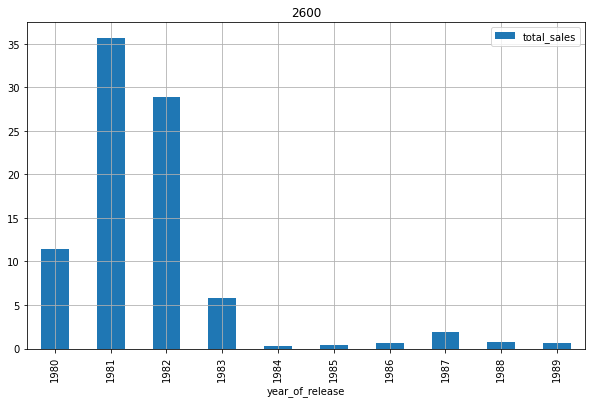

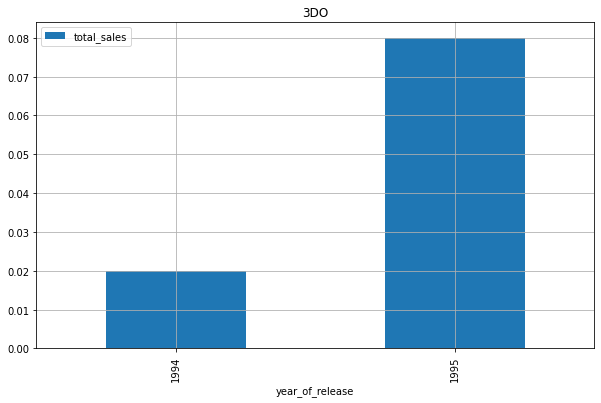

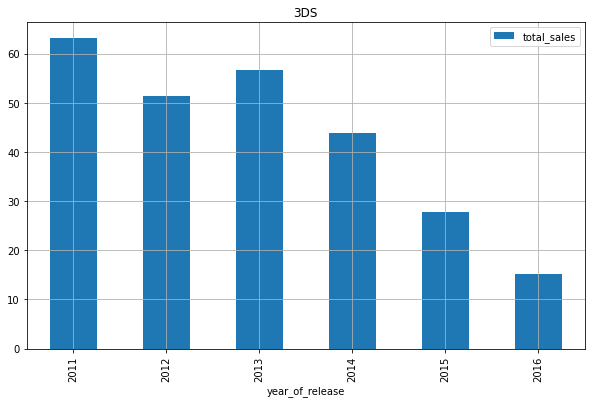

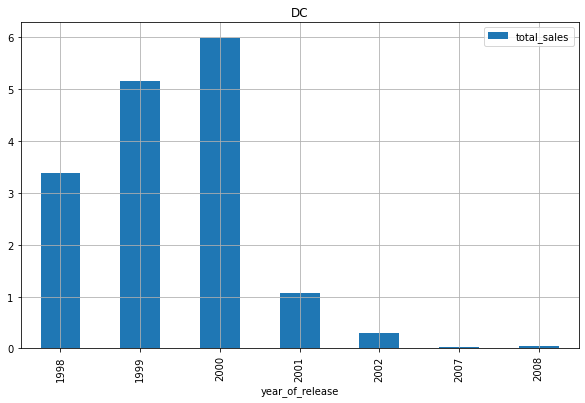

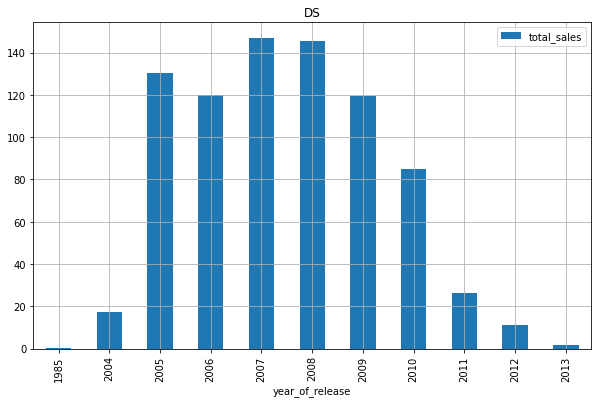

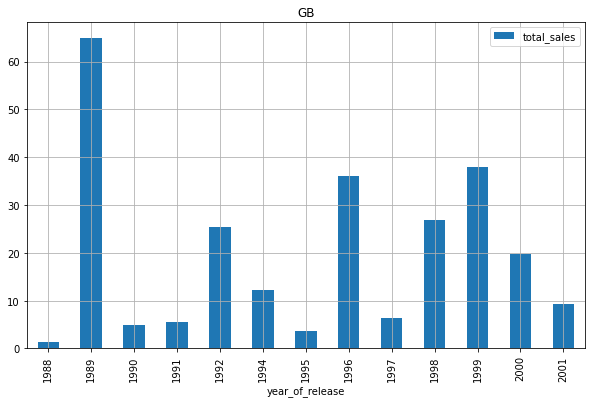

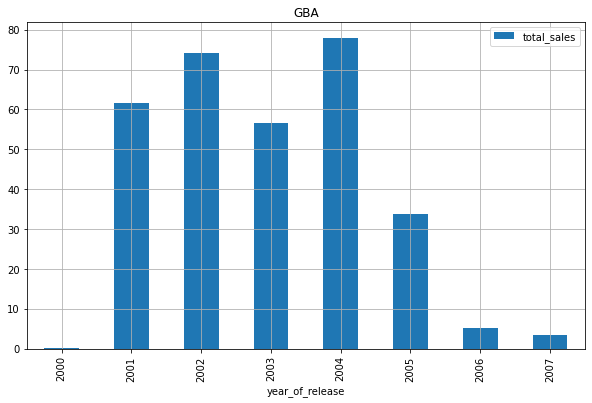

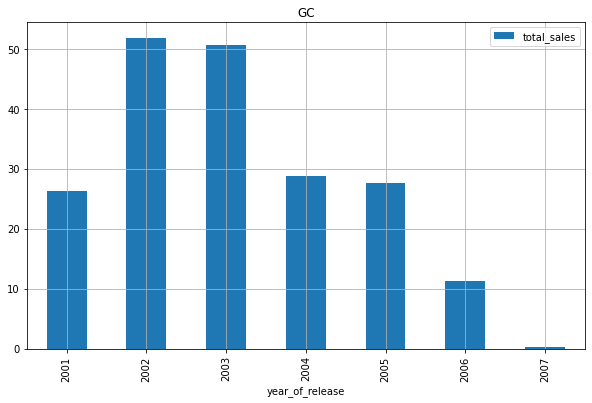

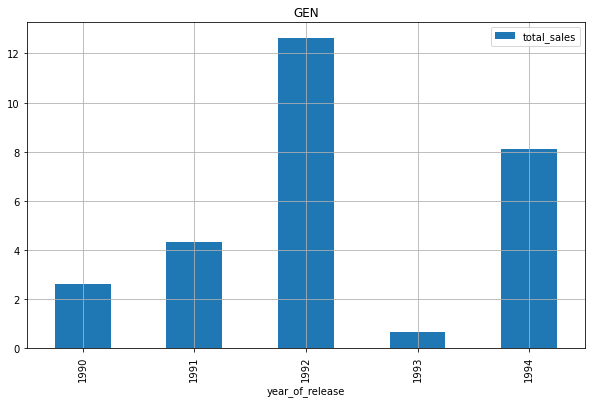

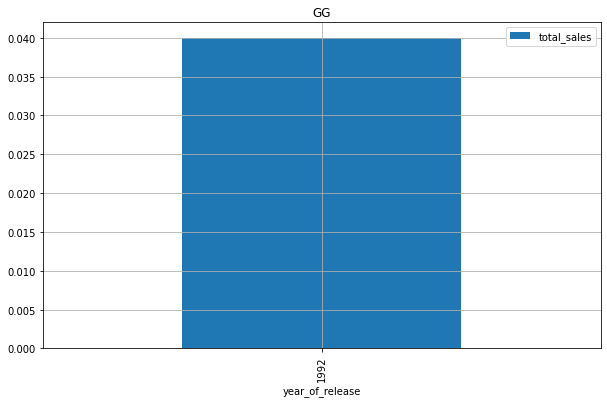

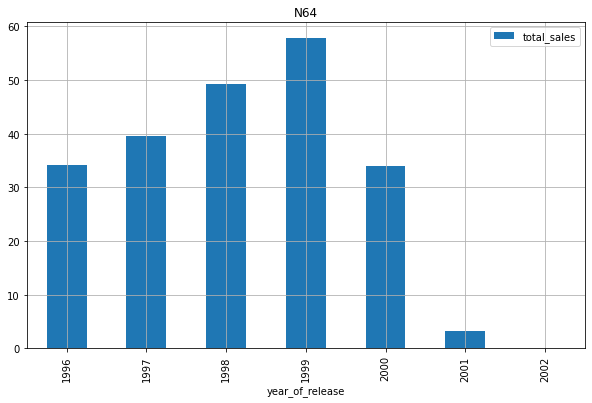

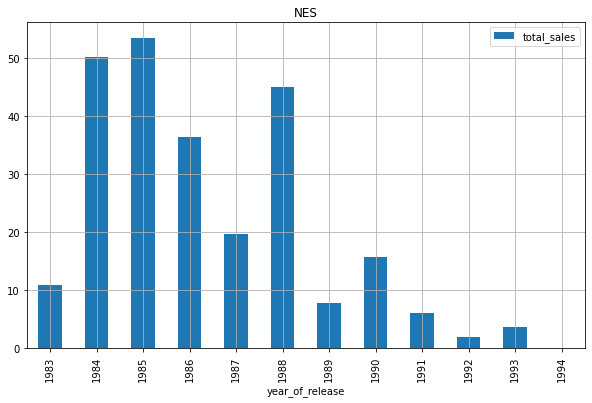

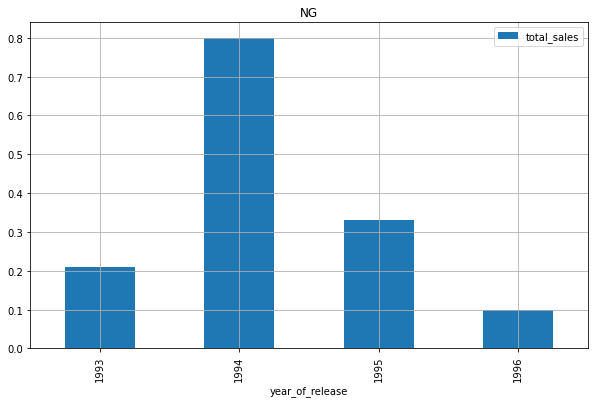

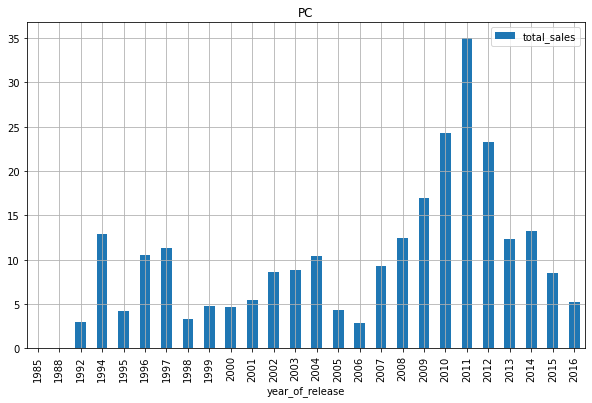

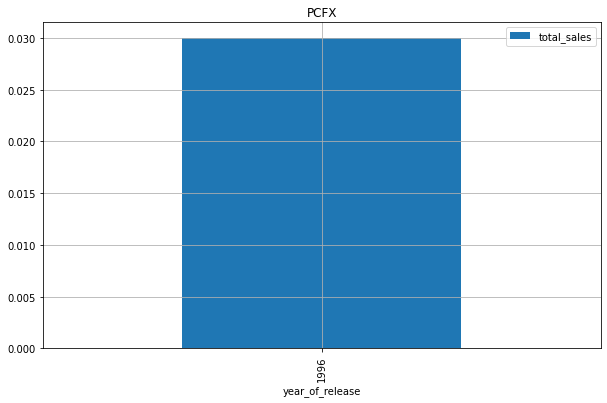

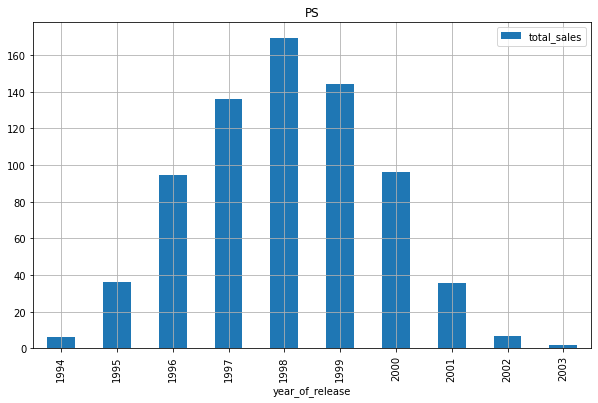

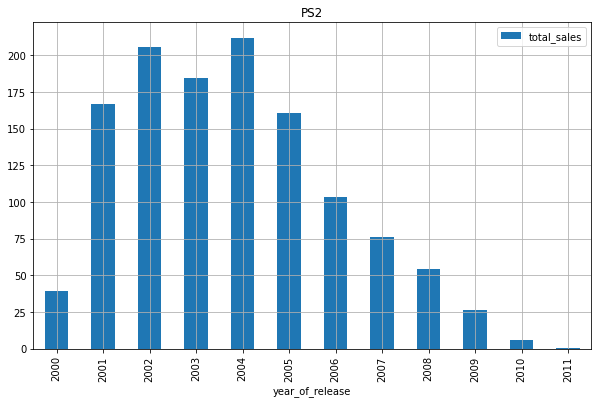

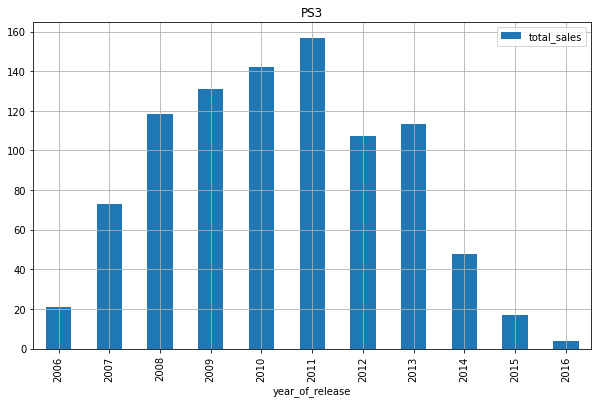

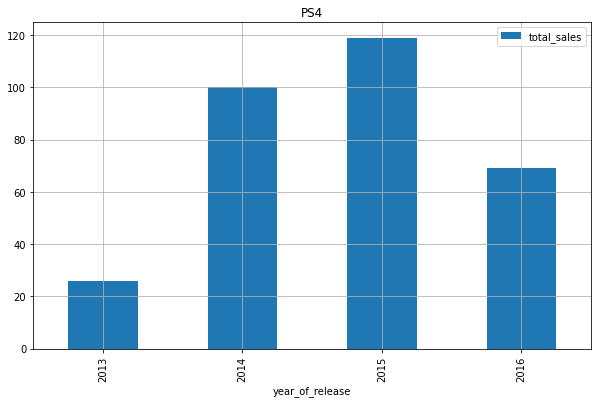

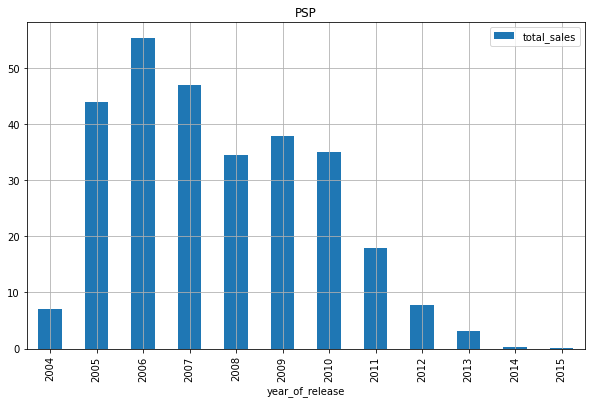

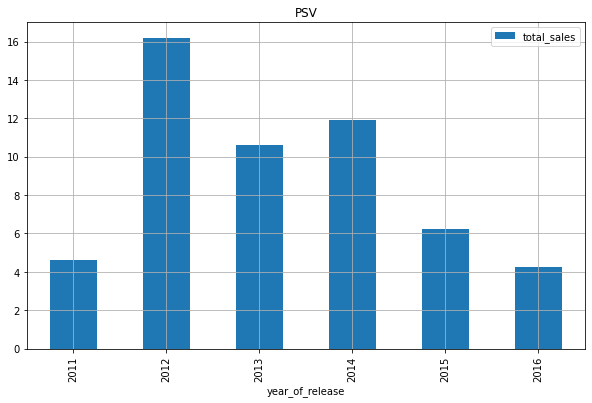

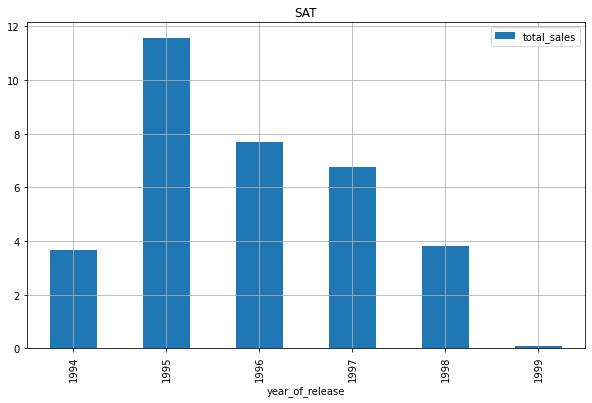

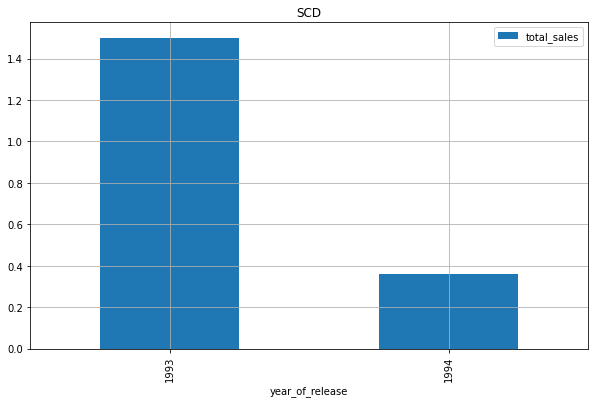

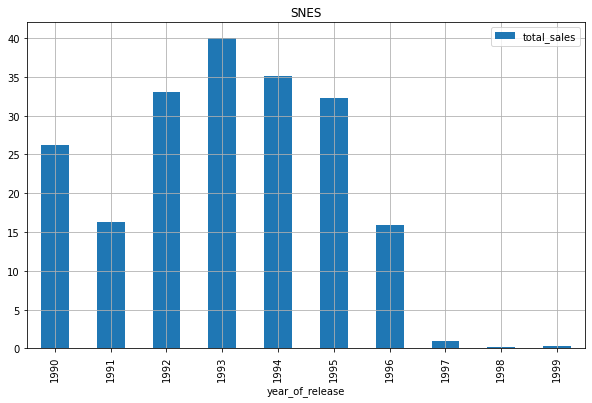

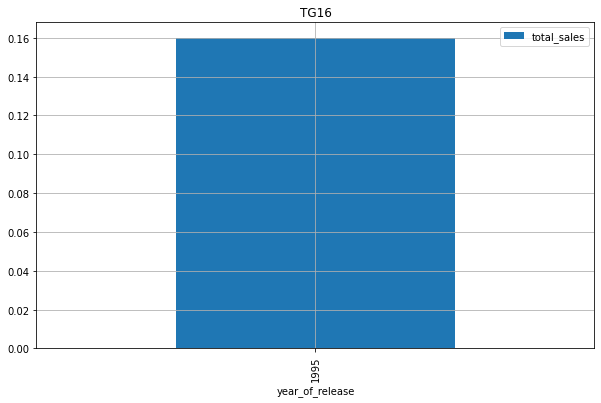

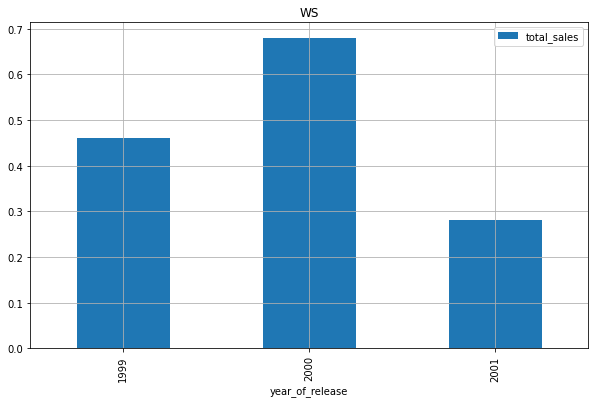

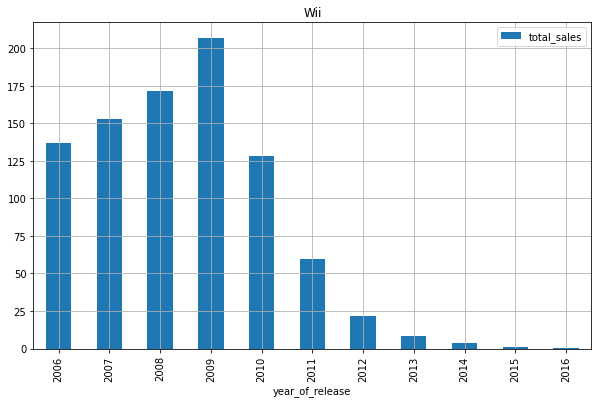

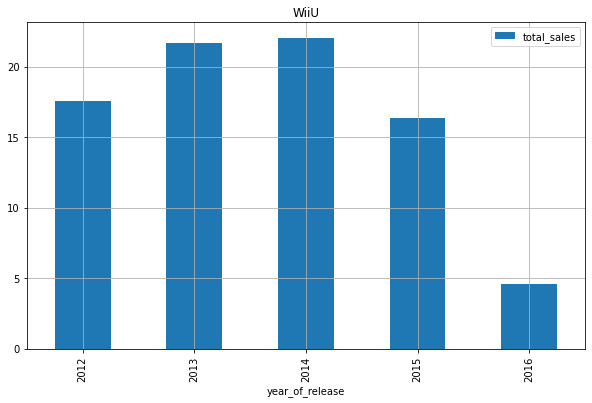

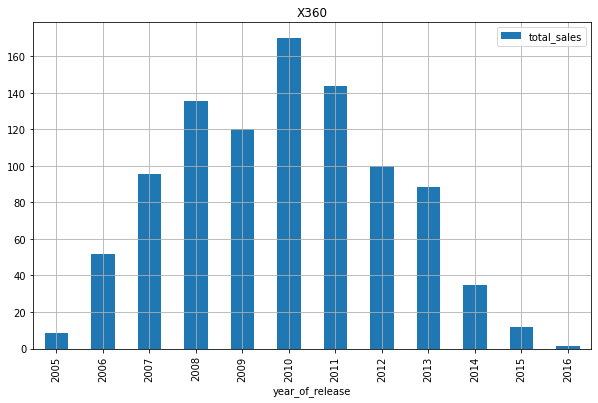

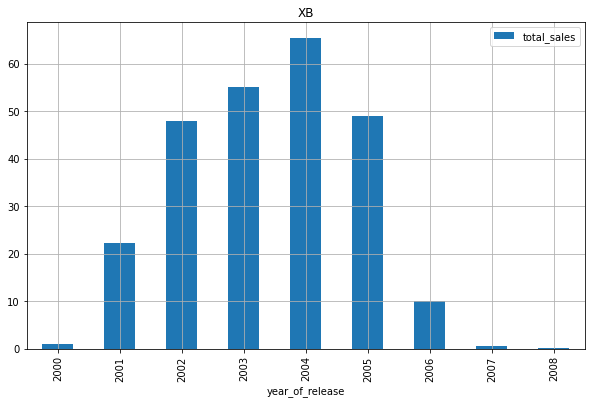

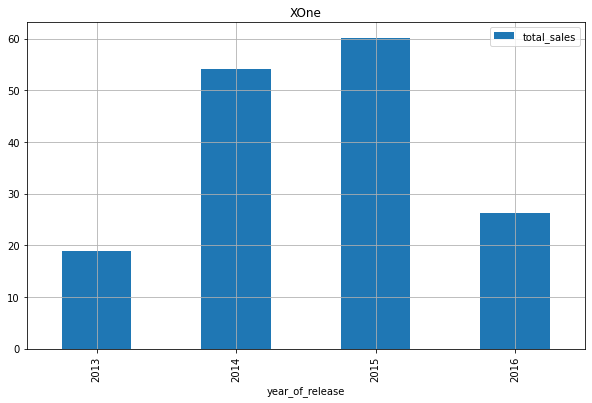

In [ ]:
for i in platforms.index:
    data.query('platform == @i' ).pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar',grid = True, figsize = (10, 6), title = i)

In [ ]:
ind = data.query('platform == "DS" and year_of_release == 1985').index
data = data.drop(ind)

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

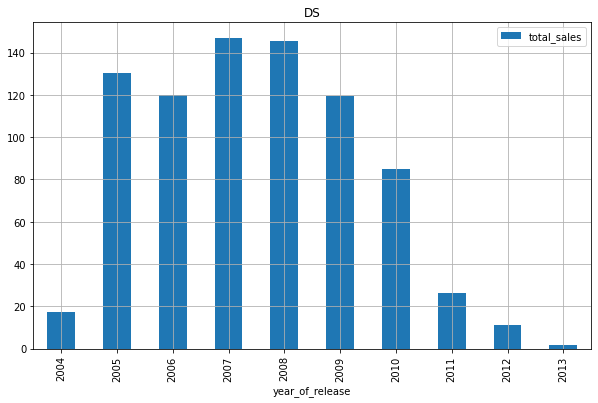

In [ ]:
data.query('platform == "DS"' ).pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar',grid = True, figsize = (10, 6), title = "DS")

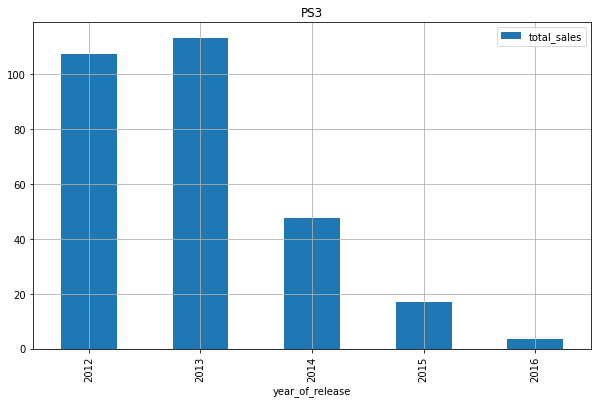

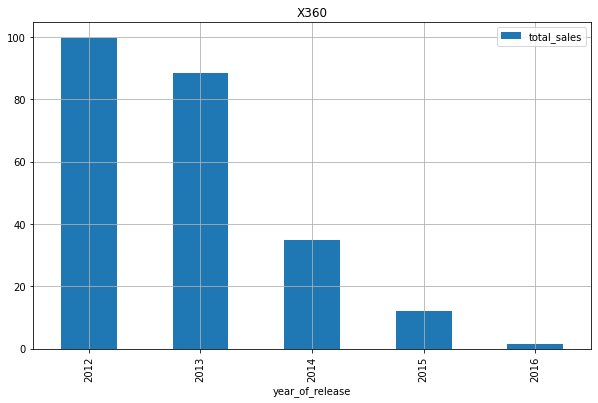

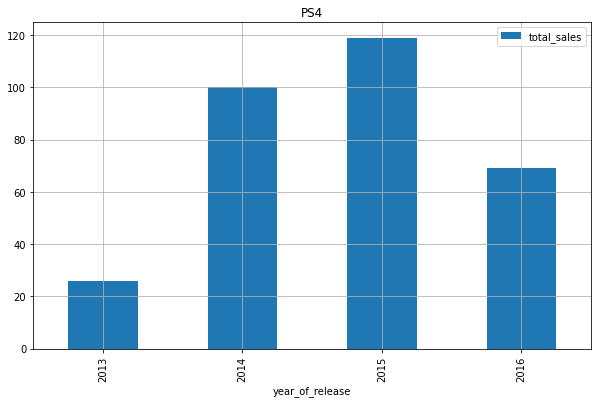

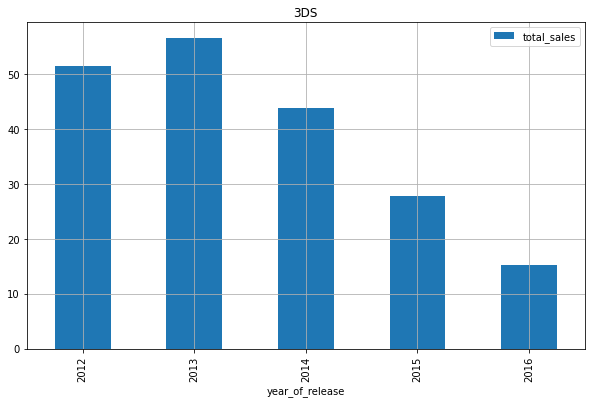

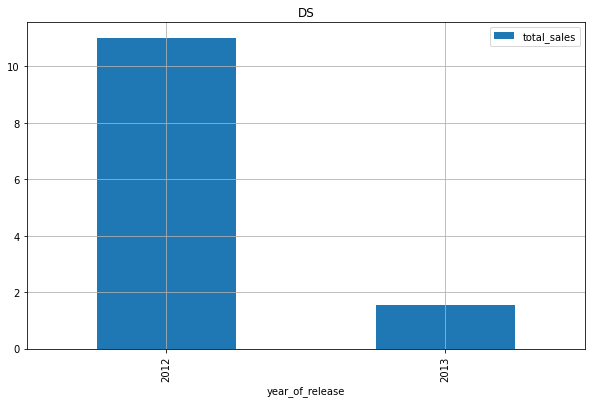

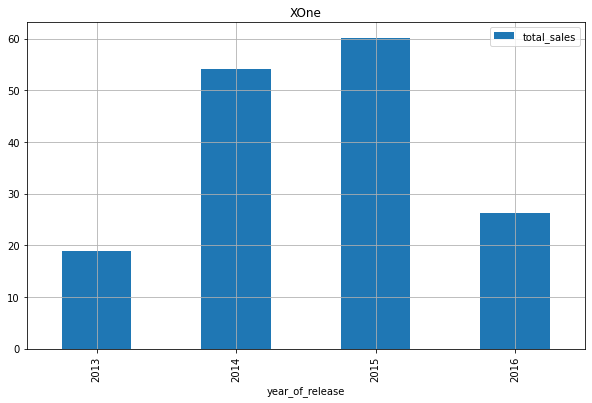

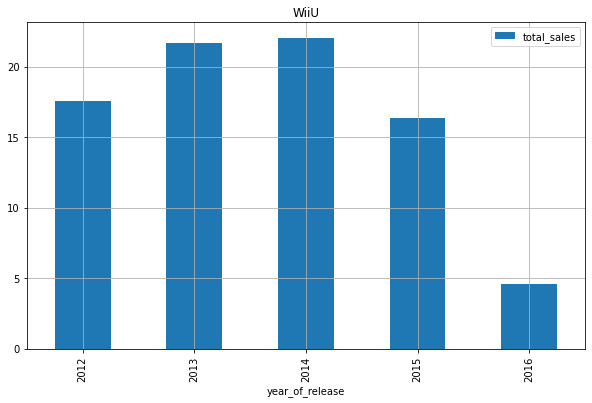

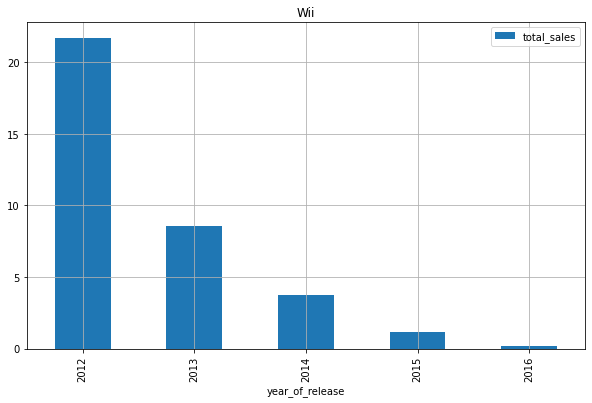

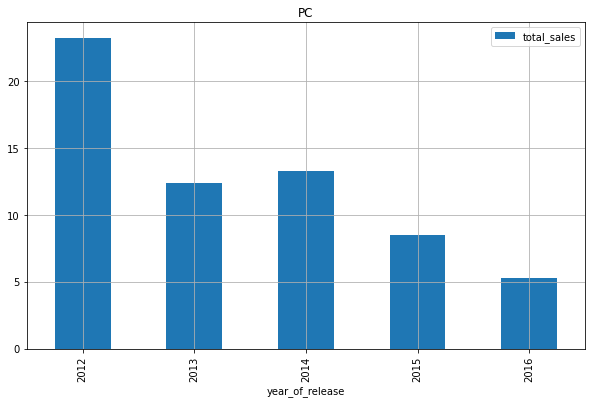

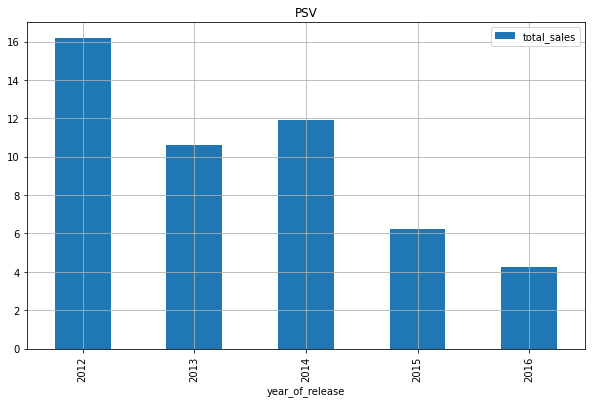

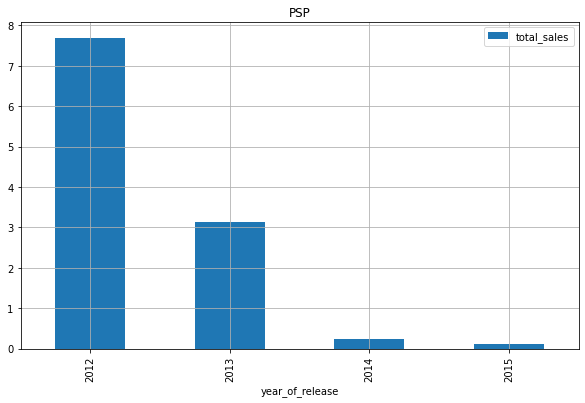

In [ ]:
relevant_data = data.query('year_of_release >= 2012').sort_values(by = 'total_sales', ascending = False)
for i in relevant_data['platform'].unique():
    data.query('platform == @i and year_of_release >= 2012').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar',grid = True, figsize = (10, 6), title = i)

Судя по графикам, к закату своей популярности подходят консоли прошлого поколения, такие как PS3, PSV, X360, WiiU и 3DS. Почетные места в анналах истории игропрома занимают Wii, PSP, PS2, XB, DS и DC. Обратить внимание стоит на Ps4 и XOne, как на платформы, сумевшие всего за четыре года своего существования войти в топ платформ с наибольшими продажами. С учетом того, что до конца их актуального периода остается как минимум год, стоит рассмотреть их как наиболее перспективные платформы для инвестиций.

Поcтроим для каждой платформы ящик с усами.

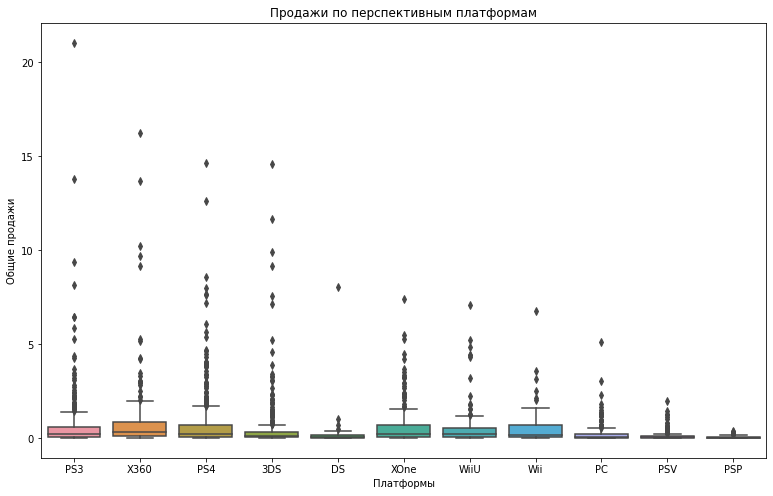

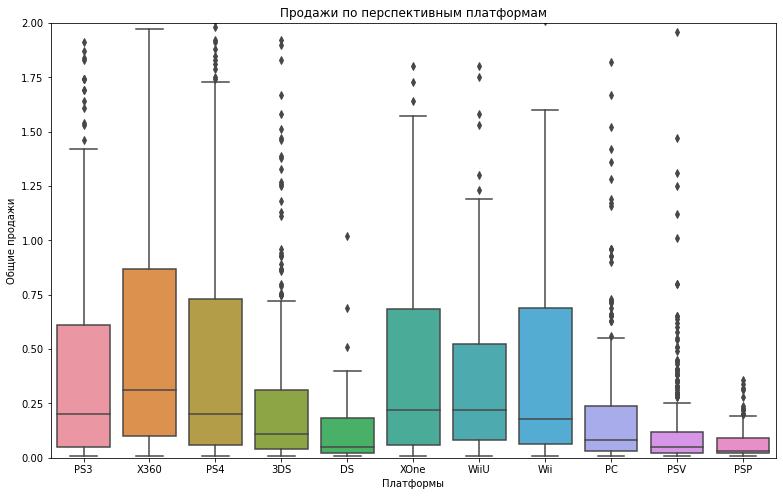

In [ ]:
import seaborn as sns
data_temp, y = relevant_data, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

Диаграммы показывают, что в среднем на каждой платформе медианное значение продаж какой-либо из игр находится в районе 0.1 - 0.2 млн копий. Так же почти у каждой платформы можно заметить некоторое количество выбросов, что свидетельствует о наличии особо популярных проектов.

Теперь исследуем зависимость между оценкой критикови пользователей и количестом продаж на одной платформе. Для примера возьмем PS3.

 Построим для этой платформы диаграмму рассеяния.

In [ ]:
fresh_data = data.query('year_of_release >= 2012')

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

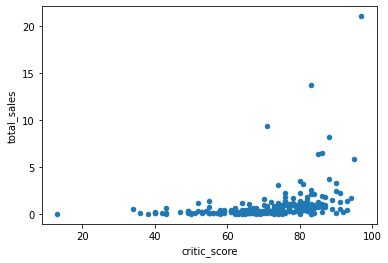

In [ ]:
fresh_data.query('platform == "PS3" and critic_score != -1').plot(kind = 'scatter', x = 'critic_score', y = 'total_sales')

Отбросив все значения продаж, находящиеся над нулем по оси оценки критиков (на нули были заменены пропуски в данном столбце), можно сказать, что для игр, чья оценка критиков варьируется в пределах от 20 до 70 баллов, число продаж примерно одинаково, и колеблется в пределах от 0 до 1 млн копий. Бестселлерами же становятся те игры, что имеют оценку в 70 баллов и выше.

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

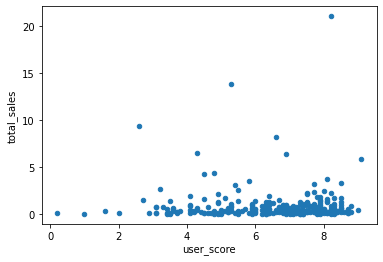

In [ ]:
fresh_data.query('platform == "PS3"and user_score != -1').plot(kind = 'scatter', x = 'user_score', y = 'total_sales')

На диаграмме зависимости отзывов пользователей и числа продаж можно увидеть примерно ту же закономерность, но можно заметить, что большинство бестселлеров имеют оценки гораздо ниже, чем оценки критиков.

Из всего этого можно сделать вывод, что к популярным и наиболее продаваемым играм пользователи относятся с строже, чем критики.

Рассчитаем коэффициент Пирсона между этими параметрами для PS3.

In [ ]:
print(fresh_data.query('platform == "PS3" and critic_score != -1').corr().loc['total_sales','critic_score'])
print(fresh_data.query('platform == "PS3" and user_score != -1').corr().loc['total_sales','user_score'])

0.33149725926295964
-0.00514352288711377


Корелляция между оценками критиков гораздо больше, чем корреляция между оценками пользователей. Проверим, как дела обстоят у других платформ.

------------------------------ PS4 ------------------------------


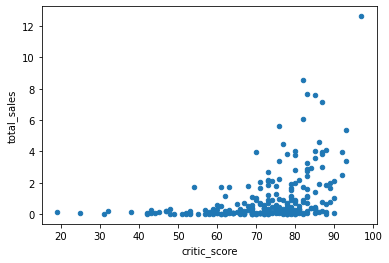

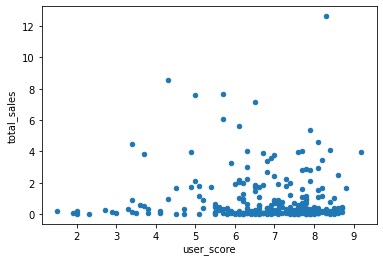

Коэффициент корелляции отзывов критиков и продаж: 0.4065679020617813
Коэффициент корелляции отзывов пользоваетелей и продаж: -0.031957110204556834

------------------------------ PS3 ------------------------------


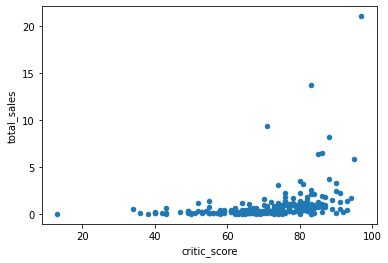

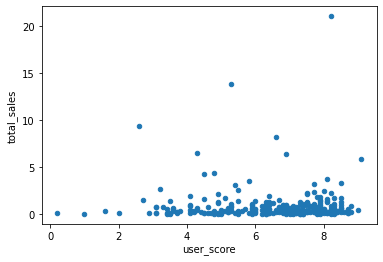

Коэффициент корелляции отзывов критиков и продаж: 0.4327589578997134
Коэффициент корелляции отзывов пользоваетелей и продаж: 0.12841562938563075

------------------------------ X360 ------------------------------


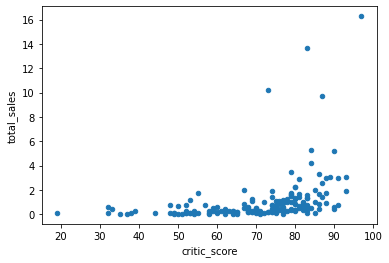

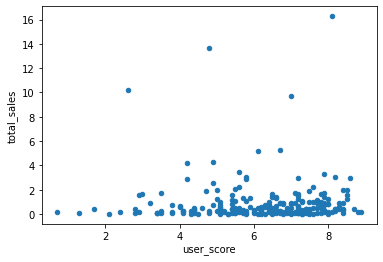

Коэффициент корелляции отзывов критиков и продаж: 0.39286589254006926
Коэффициент корелляции отзывов пользоваетелей и продаж: 0.11418661214017993

------------------------------ 3DS ------------------------------


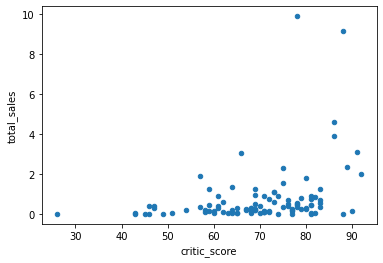

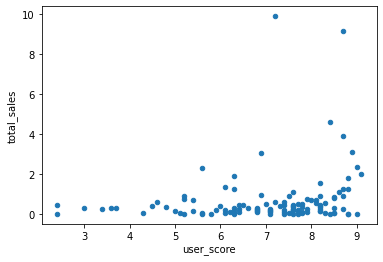

Коэффициент корелляции отзывов критиков и продаж: 0.3487397305984825
Коэффициент корелляции отзывов пользоваетелей и продаж: 0.22207843643390865

------------------------------ XOne ------------------------------


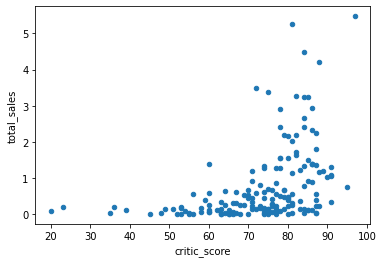

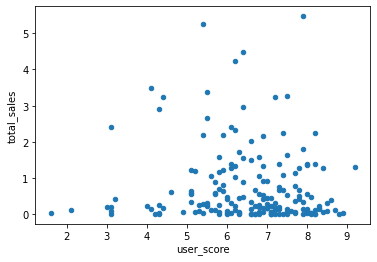

Коэффициент корелляции отзывов критиков и продаж: 0.4169983280084021
Коэффициент корелляции отзывов пользоваетелей и продаж: -0.06892505328279545

------------------------------ WiiU ------------------------------


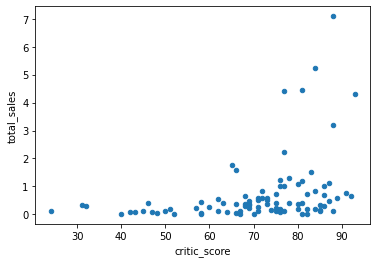

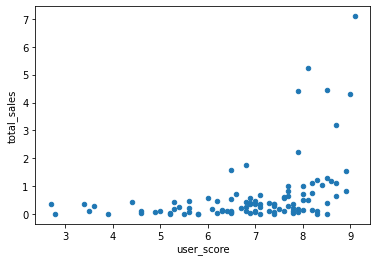

Коэффициент корелляции отзывов критиков и продаж: 0.34837976012017485
Коэффициент корелляции отзывов пользоваетелей и продаж: 0.40021902021486117



In [ ]:
top_6 = fresh_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(6)
for i in top_6.index:
    print('-' * 30, i, '-' * 30)
    fresh_data.query('platform == @i and critic_score != -1').plot(kind = 'scatter', x = 'critic_score', y = 'total_sales')
    plt.show()
    fresh_data.query('platform == @i and user_score != -1').plot(kind = 'scatter', x = 'user_score', y = 'total_sales')
    plt.show()
    print('Коэффициент корелляции отзывов критиков и продаж:',data.query('platform == @i and critic_score != -1').corr().loc['total_sales','critic_score'])
    print('Коэффициент корелляции отзывов пользоваетелей и продаж:',data.query('platform == @i and user_score != -1').corr().loc['total_sales','user_score'])
    print()

Графики и расчеты показали большие различия между коэффициентами корелляции у разных платформ. Для наиболее интересующих нас платформ, а именно Ps4 и XOne, коэффициенты корелляции между оценками пользователей и продажами оказались намного меньше, чем коэффициенты корелляции между продажами и оценками критиков, поэтому при планировании рекламной кампании для данных платформ следует обращать внимание на отзывы критиков.

Рассмотрим количество продаж в зависимости от жанра игры за актуальный период.

In [ ]:
fresh_data.groupby('genre')['total_sales'].median().sort_values(ascending = False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

(0.0, 2.0)

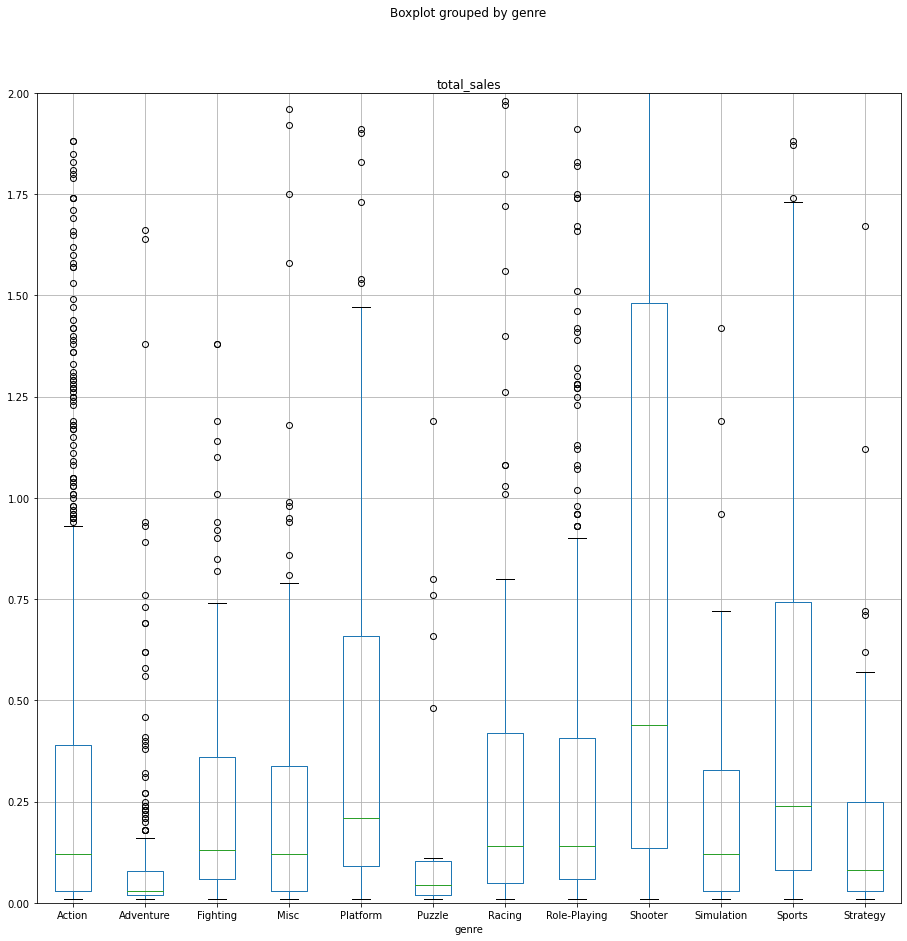

In [ ]:
fresh_data.query('genre != "-"').boxplot(column = 'total_sales', by = 'genre',figsize = (15,15))
plt.ylim(0,2)

По числу медианных продаж лидирует жанр "Shooter". На втором и третьем местах - жанры "Sports" и "Platform" соответственно. Наименне популярными по медианным продажам являются жанры "Strategy", "Puzzle" и "Adventure".

## Портрет пользователя каждого региона.

Топ-5 популярных платформ и их доли в продажах по регионам.

              Северная Америка


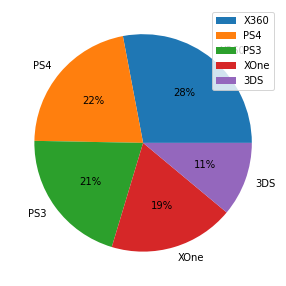

              Европа


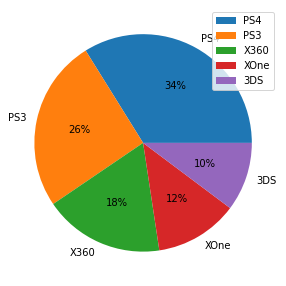

              Япония


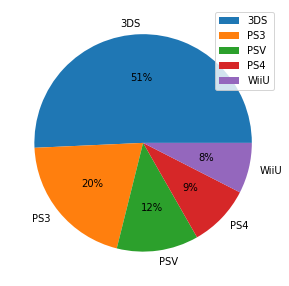

              Другие регионы


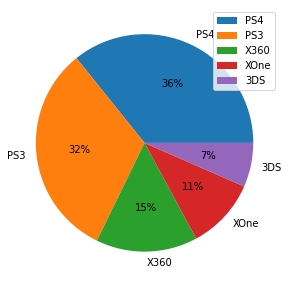

In [ ]:
region_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_names = ['Северная Америка', 'Европа', 'Япония','Другие регионы']
count = 0
for sales in region_sales:
    print(' ' * 13, region_names[count])
    count += 1
    fresh_data.pivot_table(index = 'platform', values = sales, aggfunc = 'sum' ).sort_values(by = sales, ascending = False).head(5).plot(kind = 'pie', y = sales, figsize = (5,5),autopct='%1.0f%%')
    plt.axis('off')
    plt.show()


Топ-5 популярных жанров и их доли в продажах по регионам.

              Северная Америка


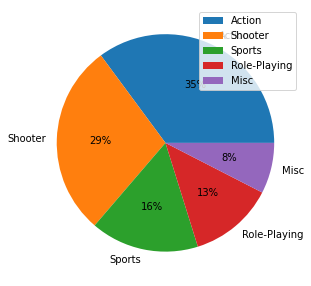

              Европа


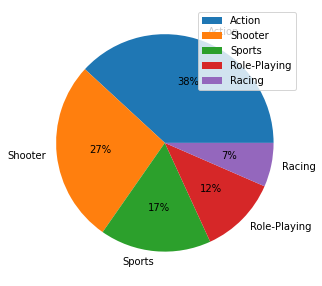

              Япония


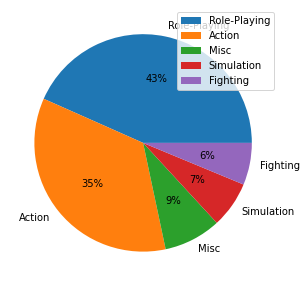

              Другие регионы


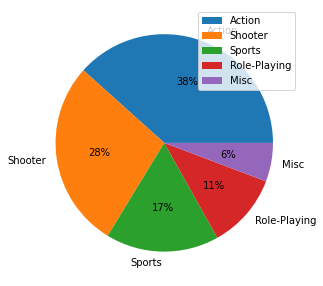

In [ ]:
count = 0
for sales in region_sales:
    print(' ' * 13, region_names[count])
    count += 1
    fresh_data.pivot_table(index = 'genre', values = sales, aggfunc = 'sum' ).sort_values(by = sales, ascending = False).head(5).plot(kind = 'pie', y = sales,figsize = (5,5),autopct='%1.0f%%')
    plt.axis('off')
    plt.show()

Доли наиболее популярных рейтингов в продажах по регионам.

              Северная Америка


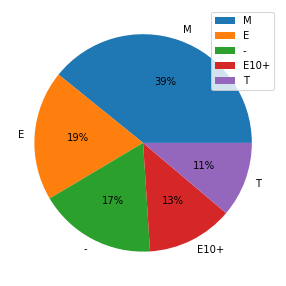

              Европа


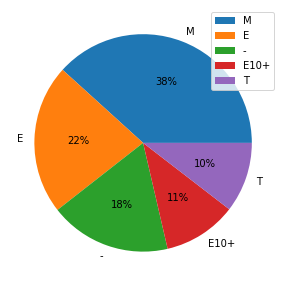

              Япония


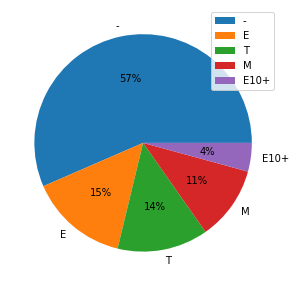

              Другие регионы


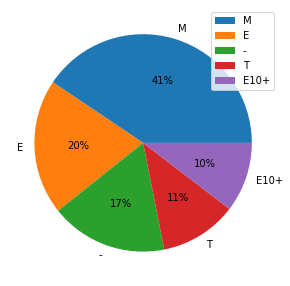

In [ ]:
count = 0
for sales in region_sales:
    print(' ' * 13, region_names[count])
    count += 1
    fresh_data.pivot_table(index = 'rating', values = sales, aggfunc = 'sum' ).sort_values(by = sales, ascending = False).head(5).plot(kind = 'pie', y = sales, figsize = (5,5),autopct='%1.0f%%')
    plt.axis('off')
    plt.show()

Как видно из таблиц, в Европе и Северной Америке по продажам превалируют игры с рейтингом M и E. В Японии больше половины от всего количества продаж занимают игры с неизвестным рейтингом. Возможно, этот тип рейтинга свойственнен только этому региону, и в таблице с общимм данными отобразился некорректно. В других регионах популярностью так же пользуется рейтинг M, E - на втором месте.

## Проверка гипотез

In [ ]:
from scipy import stats as st

Проверим гипотезу о равенстве средних пользовательских рейтингов по платформам XOne и PC:

    Нулевая гипотеза: Средние значения равны.
    Альтернативная гипотеза: Средние значения отличаются.

In [ ]:
XOne_score = fresh_data.query('platform == "XOne" and user_score != -1')['user_score']
PC_score = fresh_data.query('platform == "PC" and user_score != -1')['user_score']
alpha = 0.05
results = st.ttest_ind(XOne_score, PC_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Вероятность того, что средние показатели рейтинга будут равны между собой оказалась равной 0.54, что выше уровня значимости в 0.05. Следовательно, гипотеза о равенсте двух средних не отвергается.

Проверим гипотезу о равенстве средних рейтингов по платформам Action и Sports:

    Нулевая гипотеза: Средние значения равны.
    Альтернативная гипотеза: Средние значения отличаются.

In [ ]:
Action_score = fresh_data.query('genre == "Action" and user_score != -1')['user_score']
Sports_score = fresh_data.query('genre == "Sports" and user_score != -1')['user_score']

alpha = 0.05
results = st.ttest_ind(Action_score, Sports_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Вероятность того, что средние показатели рейтинга будут равны оказалась гораздо меньше уровня значимости в 0.05. Следовательно, гипотеза о равенстве двух средних отвергается.

## Вывод

Исследуя датасет, содержащий информацию о продажах игр были выявлены некоторые закономерности:

1.Был определен период актуальности платформы. Для большинства исследуемых платформ он составил пять лет. На основании данных о периоде актуальности проводилось дальнейшее ислледование.

2.В ходе анализа популярности платформ по продажам с учетом актуального периода были выявлены две наиболее перспективные для инвестиций платформы: PS4  и XOne.

3.Было проведено сравнение корелляции отзывов пользователей и отзывов критиков с числом продаж игры. Корелляция этих параметров для разных платформ разнится. Для Ps4 и XOne большая зависимость прослеживается между отзывами критиков и продажами.

4.Среди всех жанров были обнаружены наиболее популярные: Первое место по продажам занял жанр "Shooter", на втором и третьем - "Sports" и "Platform" соответственно. Наименее популярными жанрами оказались Puzzle, Strategy и Adventure.

5.Составлены портреты пользователей по регионам. Так, в Северной Америке пользователи предпочитают играть на X360 в игры жанров Action, Shooter  и Sport. Наиболее популярный рейтинг в данном регионе - M и E. Лидером Европы является платформа Ps4, а наиболее популярные жанры и рейтинги такие же, как в Северноей Америке. В Японии самой популярной платформой является 3DS, самыми популярными жанрами - Role-Playing, Action и Misc, а самый популярный рейтинг неизвестен. В других регионах самая популярная платформа - PS4, топ жанров вновь дублирует топ Северной Америки, как и наиболее популярный рейтинг.

6.Были проверены гипотезы о равенстве ползовательских рейтингов:
 * Не удалось отвергнуть гипотезу о равенстве двух средних значений пользователских отзывов по платформам XOne и PC
 * Получилось отвергнуть гипотезу о равенстве двух средних значений пользователских отзывов по жанрам Sports и Action.